### IMPORT LIBRARY

In [5]:
import pandas as pd  ##for data manipulation
import numpy as np   # for linear algebra 
import matplotlib.pyplot as plt #for creating static, interactive, and animated visualizations in various formats. 
import seaborn as sns  # Python data visualization library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.image as img
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report # for Precision and Recall Analysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


### LOAD ANDREAD DATA

In [6]:
data = pd.read_csv("C:/Users/LAP ME/Desktop/data sets/advertising (1).csv")

In [7]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [8]:
data.shape

(1000, 10)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [10]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [11]:
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [12]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Daily Time Spent on Site    Age  Area Income  Daily Internet Usage  \
0                       False  False        False                 False   
1                       False  False        False                 False   
2                       False  False        False                 False   
3                       False  False        False                 False   
4                       False  False        False                 False   
..                        ...    ...          ...                   ...   
995                     False  False        False                 False   
996                     False  False        False                 False   
997                     False  False        False                 False   
998                     False  False        False                 False   
999                     False  False        False                 False   

     Ad Topic Line   City   Male  Cou

In [13]:
data.dropna(inplace=True)

### VISUALIZATION ON DATA

<Axes: xlabel='Daily Internet Usage', ylabel='Clicked on Ad'>

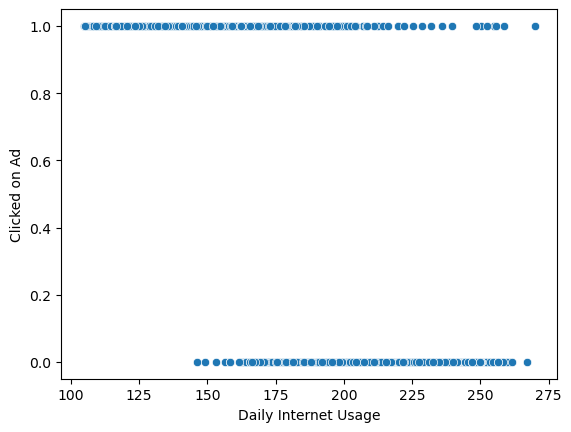

In [14]:
sns.scatterplot(data = data, x = 'Daily Internet Usage', y = 'Clicked on Ad')


D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


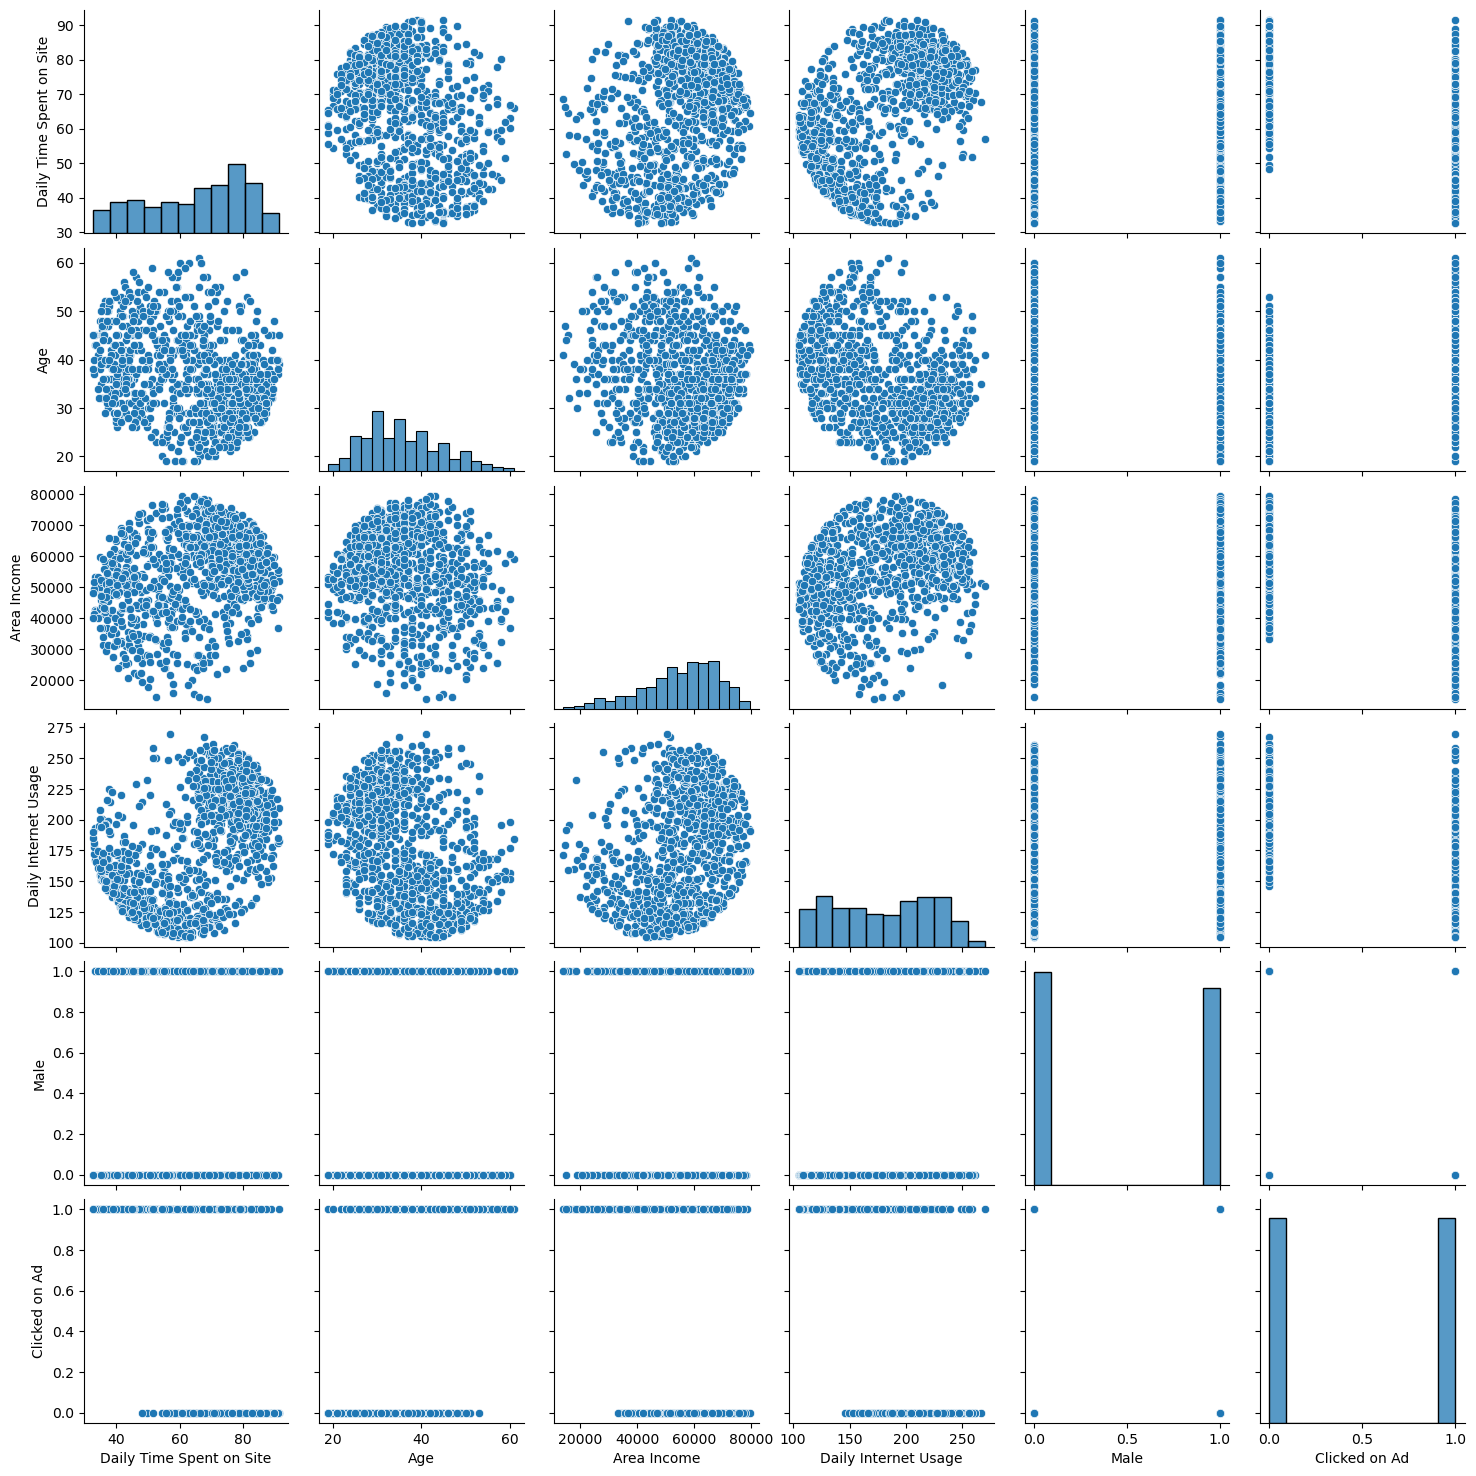

In [15]:
sns.pairplot(data)

<Axes: xlabel='Male', ylabel='count'>

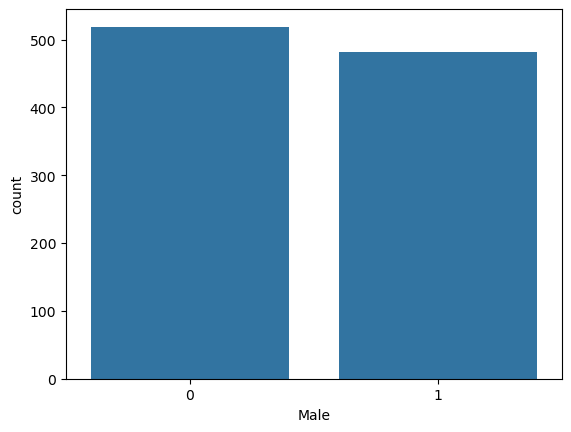

In [16]:
sns.countplot(data=data,x='Male')
#  countplot for Frequency Counts & Data Exploration

<Axes: >

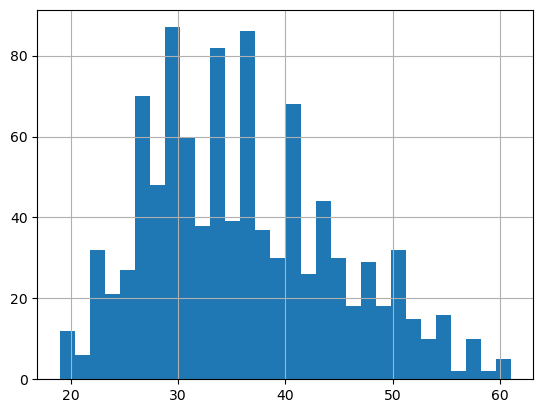

In [17]:
data['Age'].hist(bins=30) # histplot  for Visualizing Data Distribution 

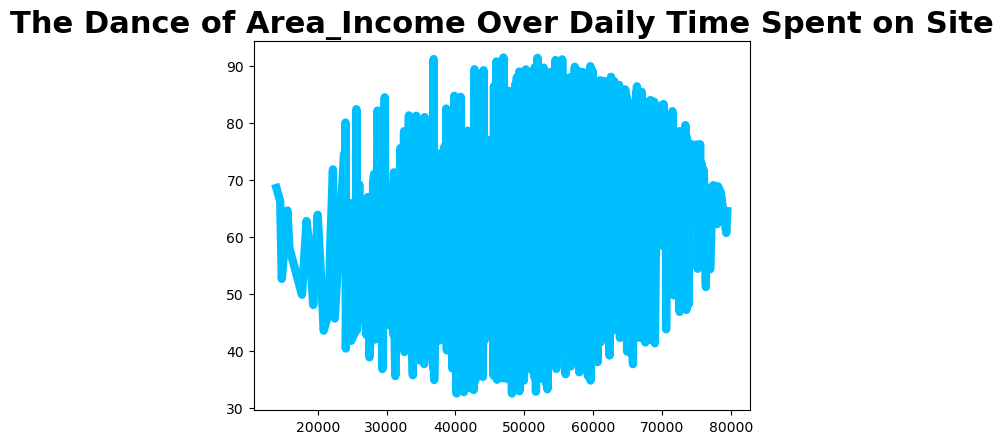

In [18]:
Area_Income = data.groupby("Area Income")["Daily Time Spent on Site"].mean()
plt.plot(Area_Income.index, Area_Income.values, color="deepskyblue", linewidth=6)
plt.title("The Dance of Area_Income Over Daily Time Spent on Site", fontsize=22, fontweight="bold")
plt.show()

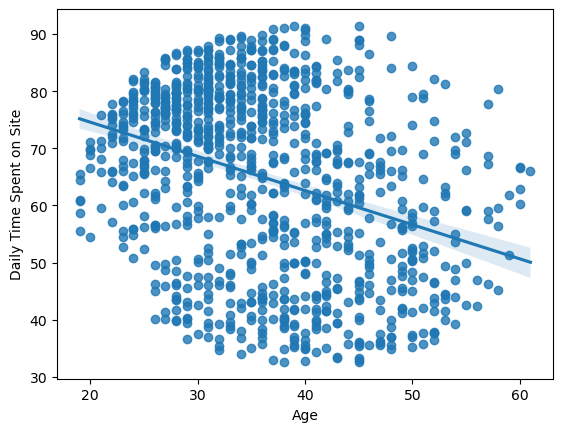

In [19]:
sns.regplot(x = "Age", y = "Daily Time Spent on Site", data = data)
plt.show()


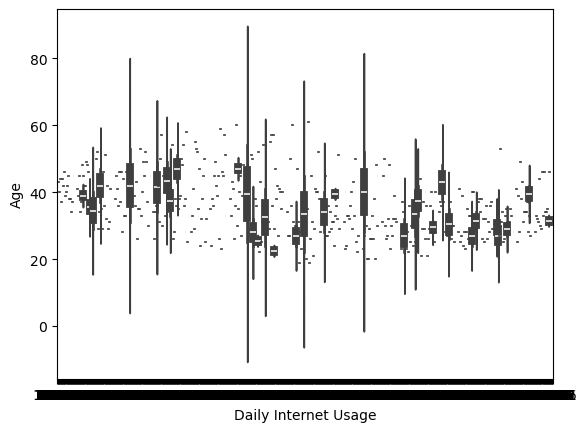

In [20]:
sns.violinplot(x = "Daily Internet Usage", y = "Age", data = data)
plt.show()

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


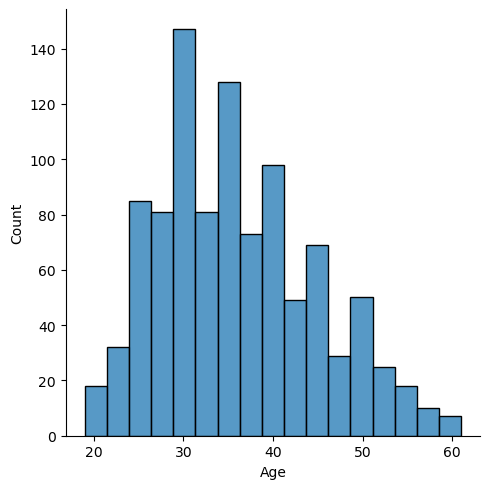

In [21]:
sns.displot(data['Age'])

In [22]:
x=data.drop('Clicked on Ad',axis =1)
y = data['Clicked on Ad']

### DATA PREPROCESSING 

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [24]:
for col in x.columns:
    x[col] = label_encoder.fit_transform(x[col])

In [25]:
x.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp
0,468,16,645,955,91,961,0,215,439
1,724,12,853,538,464,903,1,147,474
2,478,7,575,871,566,111,0,184,367
3,573,10,437,913,903,939,1,103,56
4,457,16,955,784,766,805,0,96,767


In [26]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Clicked on Ad, dtype: int64

### SPLIT DATA 

In [27]:

x_train , x_test , y_train , y_test = train_test_split (x,y,test_size = .3 ,shuffle = True , random_state =42)

In [28]:
print("x_train shape = ", x_train.shape)
print("y_train shape = ", y_train.shape)
print("x_test shape = ", x_test.shape)
print("y_test shape = ", y_test.shape)

x_train shape =  (700, 9)
y_train shape =  (700,)
x_test shape =  (300, 9)
y_test shape =  (300,)


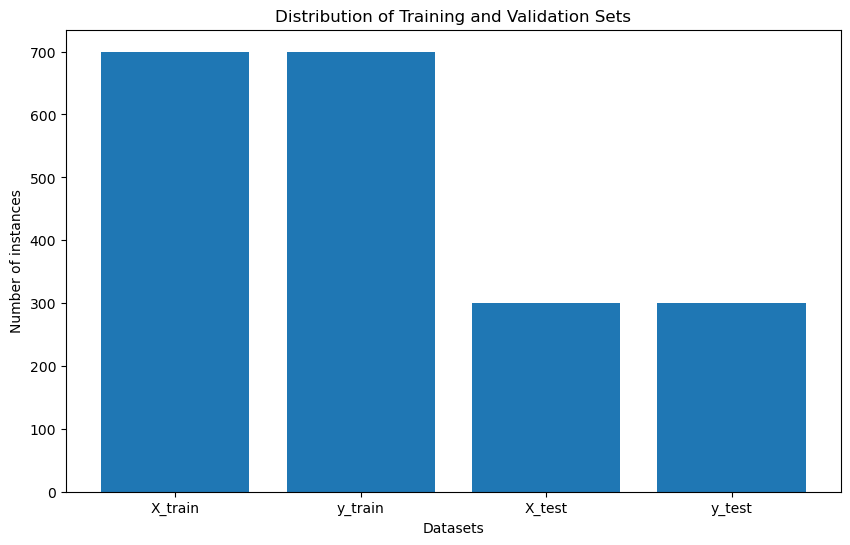

In [29]:
shapes = {
    'X_train': x_train.shape[0],
    'y_train': y_train.shape[0],
    'X_test': x_test.shape[0],
    'y_test': y_test.shape[0]
}
plt.figure(figsize=(10, 6))
plt.bar(shapes.keys(), shapes.values())
plt.xlabel('Datasets')
plt.ylabel('Number of instances')
plt.title('Distribution of Training and Validation Sets')
plt.show()

### SCALING FOR DATA 

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

### BUILDING MODEL

In [32]:
lr_model=LogisticRegression() # call model


In [33]:
lr_model.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)

In [34]:
y_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0], d

In [35]:
 con= confusion_matrix(y_test,y_pred) # Evaluation of Model Performance & Sensitivity and Specificity Analysis

<Axes: >

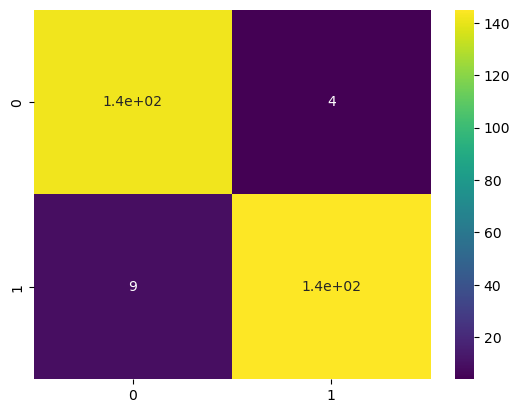

In [36]:
sns.heatmap(con, annot=True, cmap='viridis', cbar=True) # heatmap for Matrix Data Representation

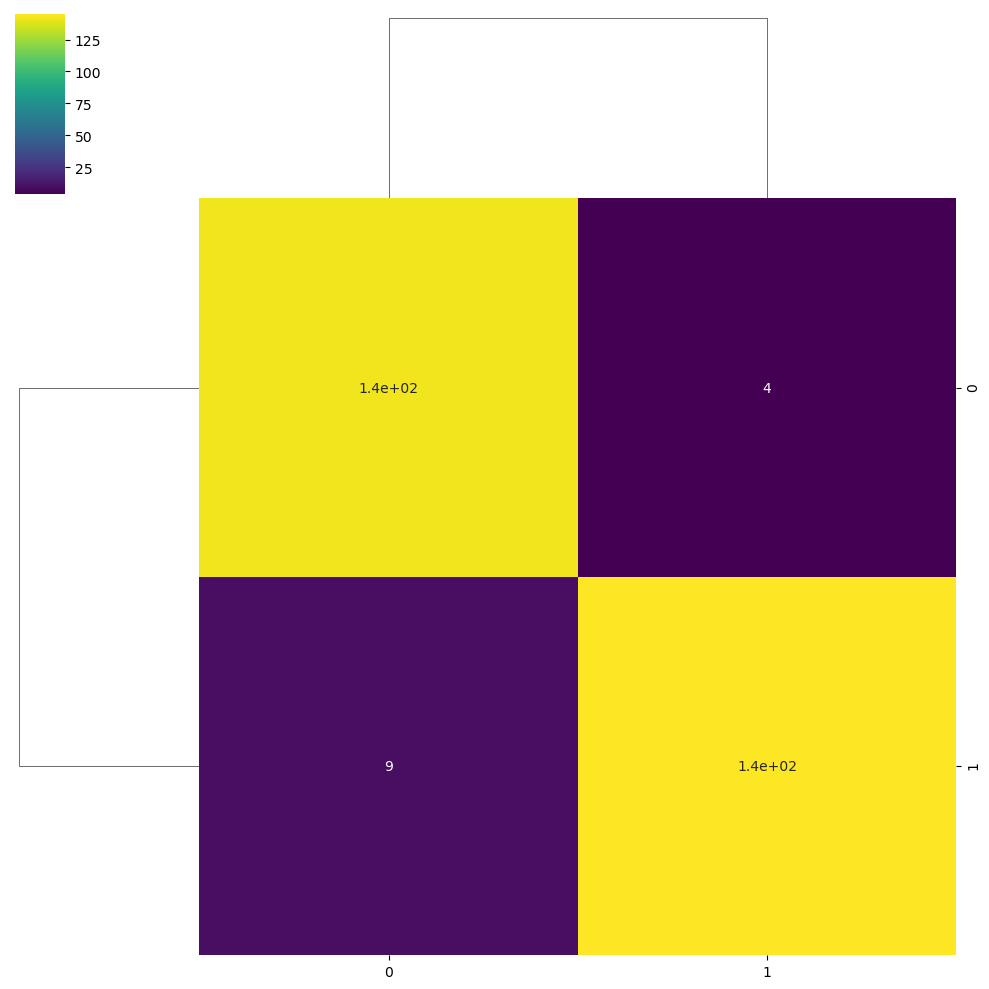

In [37]:
sns.clustermap(con, annot=True, cmap='viridis', cbar=True) # clustermap for Discovering Patterns and Relationships

In [38]:
print("classification_report is ",classification_report(y_test ,y_pred)) 

classification_report is                precision    recall  f1-score   support

           0       0.94      0.97      0.96       146
           1       0.97      0.94      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



### KNN MODEL

In [39]:
knn_model = KNeighborsClassifier()

In [40]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [41]:
knn_pred = knn_model.predict(x_test)

In [42]:
knn_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0], d

In [43]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       146
           1       0.98      0.91      0.94       154

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.95      0.94      0.94       300



### GAUSSIANNB MODEL

In [44]:
nb_model = GaussianNB()

In [45]:
nb_model.fit(x_train, y_train)

GaussianNB()

In [46]:
y_pred = nb_model.predict(x_test)

In [47]:
y_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0], d

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       146
           1       0.97      0.94      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



## **Enhance Model Performance**

In [49]:
import warnings
warnings.filterwarnings("ignore")

In [50]:

from sklearn.model_selection import GridSearchCV

In [51]:
parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]
grid_search = GridSearchCV(lr_model,
                           parameters,
                           cv = 5,
                           verbose=0)


grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}])

In [54]:
print("classification_report is ",classification_report(y_test ,y_pred)) 

classification_report is                precision    recall  f1-score   support

           0       0.93      0.97      0.95       146
           1       0.97      0.94      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

